# Projet algo sto

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint, rand
import itertools

Soit n ∈ N. Un graphe consiste à un ensemble de n sommets, noté S = {s1, ..., sn}, qui sont
reliés par des arêtes. Chaque arête possède une valeur numérique (strictement positive) appelée poids.
Un graphe peut être représenté par une matrice carré M de taille n, appelée matrice d’adjacence, où dans
la i-ème ligne et dans la j-ème colonne on met le poids d’arête joignant le sommet $s_i$ à $s_j$ (ou 0 si les deux
sommets ne sont pas liés). Par définition, on posera 1 partout sur la diagonale. La matrice d’adjacence
est donc symétrique.

Définissons le poids $P(s_i)$ d’un sommet si comme le produit de la i-ème ligne de la matrice d’adjacence
M. La fonction de coût (ou l’´energie totale) est la somme des poids de tous les sommets.

# Mise en place des poids et des énergies 

Tout d'abord, pour faciliter nos fonctions, les graphes seront representé par le numéro de leurs indices. Par exemple, $S=\left\{1,2,3,..,n\right\}$ est un graphe à n sommets.

In [5]:
def graphe(n):
    return(list(np.arange(1,n+1)))

In [48]:
graphe(3)

[1, 2, 3]

On commence d'abord par créer une fonction poids, qui en fonction du sommet, du graphe et de la matrice d'adjacence, nous retournera le poids de ce sommet.

In [230]:
def poids(sommet,graphe,matrice):
    i = np.where(graphe==sommet)
    poids = 1
    n = matrice.shape[0] #nombre de lignes(=nb de colonne) de la matrice
    for j in range(0,n):
        poids = poids*matrice[i,j]
    return(int(poids))

On vérifie cet exemple en appliquant ce poids à la matrice présentée en exemple : $A = \begin{matrix}
1 & 2 & 3\\
2 & 1 & 5 \\
3 & 5 & 1
\end{matrix}$ 

In [237]:
graphe1 = np.array([1,2,3])
matrice = np.array([[1,2,3],[2,1,5],[3,5,1]])


print("Le poids du premier sommet est",poids(1,graphe1,matrice))
print("Le poids du deuxième sommet est",poids(2,graphe1,matrice))
print("Le poids du troisième sommet est",poids(3,graphe1,matrice))

Le poids du premier sommet est 6
Le poids du deuxième sommet est 10
Le poids du troisième sommet est 15


On peut maintenant calculer l'énergie totale du graphe :

In [236]:
def energie(graphe,matrice):
    energie = 0
    m = matrice.shape[0]
    for i in range(0,m):
        energie += poids(graphe[i],graphe,matrice) #calcule et ajoute le poids de chaque ligne
    return(energie)

In [212]:
energie(graphe1,matrice)

31

# Création d'une liste de nombres premiers, et de la matrice d'adjacence à partir d'une liste

On crée une liste de $\frac{n(n-1)}{2}$ nombre premiers, puisque ça représente le nombre d'éléments dans un graphe pour une matrice d'adjacence avec n lignes.

In [11]:
def liste_np(n):
    liste = []
    k=3
    while len(liste) != int(n*(n-1)/2):
        for j in range(2, int(k/2)+1):
                 if (k % j) == 0:
                    break
        else:
            liste.append(k)
        k=k+1
    return(liste)

In [12]:
liste_np(5)

[3, 5, 7, 11, 13, 17, 19, 23, 29, 31]

création d'une matrice adjacente à partir d'une liste:

In [205]:
def adjacente(n,liste):
    M = np.zeros((n,n))
    c = 0
    for i in range(0,n):
        for j in range(i+1,n):
            M[i,j] = liste[c]
            M[j,i] = liste[c]
            c += 1
    for i in range(0,n):
        M[i,i] = 1       
    return(M)

print(adjacente(5,liste_np(5)))

[[ 1.  3.  5.  7. 11.]
 [ 3.  1. 13. 17. 19.]
 [ 5. 13.  1. 23. 29.]
 [ 7. 17. 23.  1. 31.]
 [11. 19. 29. 31.  1.]]


# Mise en place de l'algorithme génétique sans croisement

In [150]:
taille_pop = 10
proba_mut = 1/2
n=5
np.random.seed(16)

Notre population initiale est la liste des $\frac{n(n-1)}{2}$ premiers nombres premiers, obtenus via ma fonction *liste_np*.
Créons une fonction qui nous crée une population initialie contenant $n_1$fois (taille de la population) la liste *liste_np*.


In [15]:
def population_init(n):
    # Population initiale se compose d'individus tirés au hasard
    return [liste_np(n) for _ in range(taille_pop)]

Notre première étape de l'algorithme génétique est la mutation : avec une probabilité de mutation p, une matation se produira. Dans notre contexte, la mutation revient à effectuer une permutation aléatoire de notre liste. En d'autre termes, chaque élément de notre population aura une probabilité p d'effectuer une permutation.

In [149]:
def mutation(population):
    for i in range(0,len(population)):
        if rand() < proba_mut:
            population[i] = list(np.random.permutation(population[i]))
                   
                    

In [17]:
a = population_init(5)
a #notre population initiale avec taille_pop liste de nombre premiers.

[[3, 5, 7, 11, 13, 17, 19, 23, 29, 31],
 [3, 5, 7, 11, 13, 17, 19, 23, 29, 31],
 [3, 5, 7, 11, 13, 17, 19, 23, 29, 31],
 [3, 5, 7, 11, 13, 17, 19, 23, 29, 31],
 [3, 5, 7, 11, 13, 17, 19, 23, 29, 31],
 [3, 5, 7, 11, 13, 17, 19, 23, 29, 31],
 [3, 5, 7, 11, 13, 17, 19, 23, 29, 31],
 [3, 5, 7, 11, 13, 17, 19, 23, 29, 31],
 [3, 5, 7, 11, 13, 17, 19, 23, 29, 31],
 [3, 5, 7, 11, 13, 17, 19, 23, 29, 31]]

In [21]:
mutation(a)

In [22]:
a #on remarque bien que certains éléments de notre population ont subi une permutation

[[5, 29, 11, 31, 13, 17, 23, 19, 7, 3],
 [31, 7, 3, 23, 17, 5, 13, 19, 29, 11],
 [17, 23, 19, 5, 31, 7, 29, 11, 13, 3],
 [3, 5, 7, 11, 13, 17, 19, 23, 29, 31],
 [23, 7, 13, 29, 17, 31, 5, 11, 3, 19],
 [19, 11, 23, 13, 31, 7, 17, 5, 3, 29],
 [3, 5, 7, 11, 13, 17, 19, 23, 29, 31],
 [31, 23, 11, 3, 19, 13, 5, 17, 7, 29],
 [5, 23, 7, 29, 13, 3, 31, 11, 19, 17],
 [29, 3, 11, 19, 5, 17, 31, 23, 7, 13]]

On a donc modélisé la façon dont les listes peuvent muter, on va donc créer une fonction qui nous retournera une liste avec des valeurs pour l'énergie qui sont optimales. On va en effet effectuer une sélection sur notre liste après mutation.

In [23]:
def loi_discrete(p):
    # TP 2
    F = np.cumsum(p)
    i = 0
    choix = rand()
    while choix > F[i]:
        i += 1
    return i

In [156]:
def cycle_de_vie(pop,n):
    # 1. Mutation
    mutation(pop) 
    # 2. Selection
    energie_pop = [energie(graphe(n),adjacente(n,e)) for e in pop] #liste qui contient l'energie de chaque élement de notre population
    const_norm = sum(energie_pop)
    # probabilité de selection
    proba_sel = [energie / const_norm for energie in energie_pop] #probabilité de selection de chaque élément de notre population
    # Construction de la génération suivante
    next_gen = []
    for i in range(taille_pop):
        k = loi_discrete(proba_sel)
        next_gen.append(pop[k])
        
    return next_gen  

# Recherche de l'élément avec la meilleure énergie

Notre objectif est de créer une fonction qui simulera un grand nombre de fois la fonction *cycle_de_vie* et de calculer l'énergie pour chaque élément de la population. On gardera en mémoire l'individu avec la meilleure énergie jusqu'à que l'on trouve un individu encore meilleur.

In [155]:
def meilleure_population(n):
    population = population_init(n) 
    nbr_gen = 5000
    best_energy_ever = 0
    best_gen = 0
    best_population = population
    liste_ener = []
    for i in range(nbr_gen):
        population = cycle_de_vie(population,n)
        best_energy_this_gen = max([energie(graphe(n),adjacente(n,ind)) for ind in population])
        liste_ener.append(best_energy_this_gen)
        if best_energy_this_gen > best_energy_ever:
            best_energy_ever = best_energy_this_gen
            best_population = population
            best_gen = i
    best_ind = best_population[np.argmax([energie(graphe(n),adjacente(n,best_population[i])) for i in range(0,len(best_population))])]
    return(best_energy_ever,best_ind,best_gen,liste_ener)

#[np.argmax([energie(graphe(n),adjacente(n,best_population[i])) for i in range(0,len(best_population)])]

In [167]:
meilleure_population(5)

In [44]:
e4 = meilleure_population(4)
e5 = meilleure_population(5)
e6 = meilleure_population(6)
e7 = meilleure_population(7)

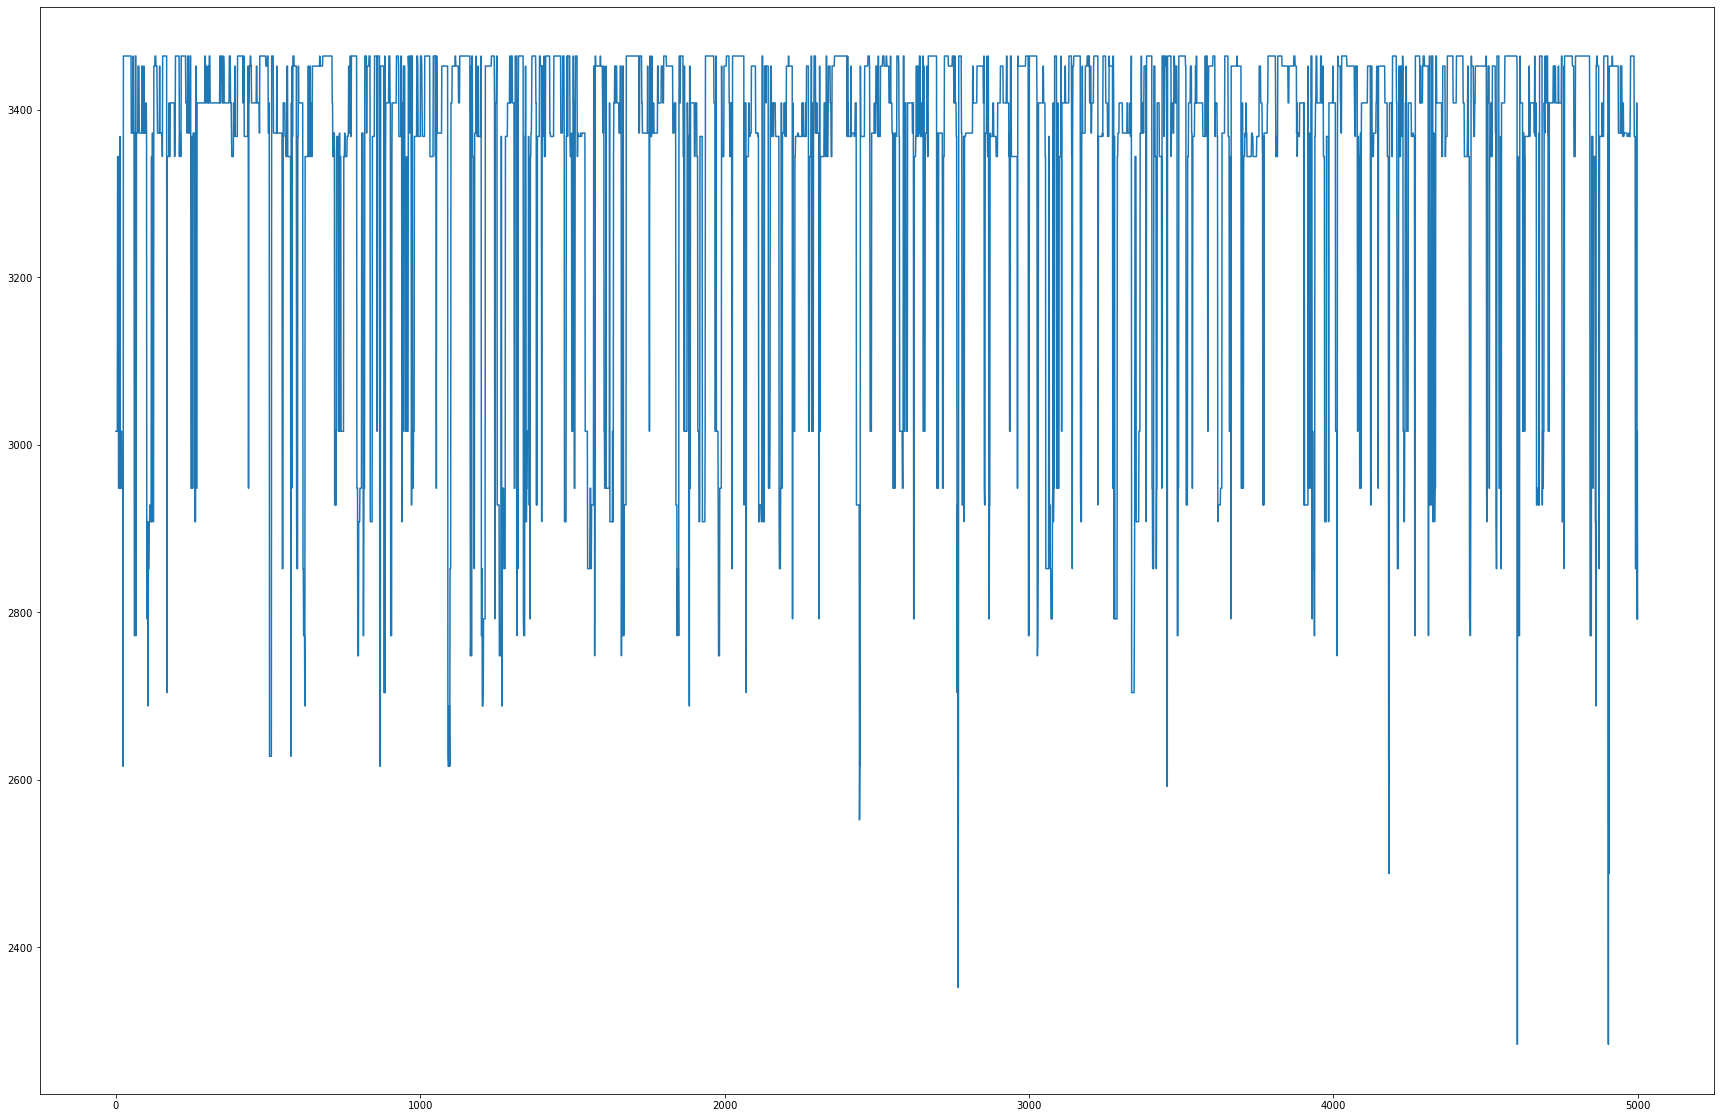

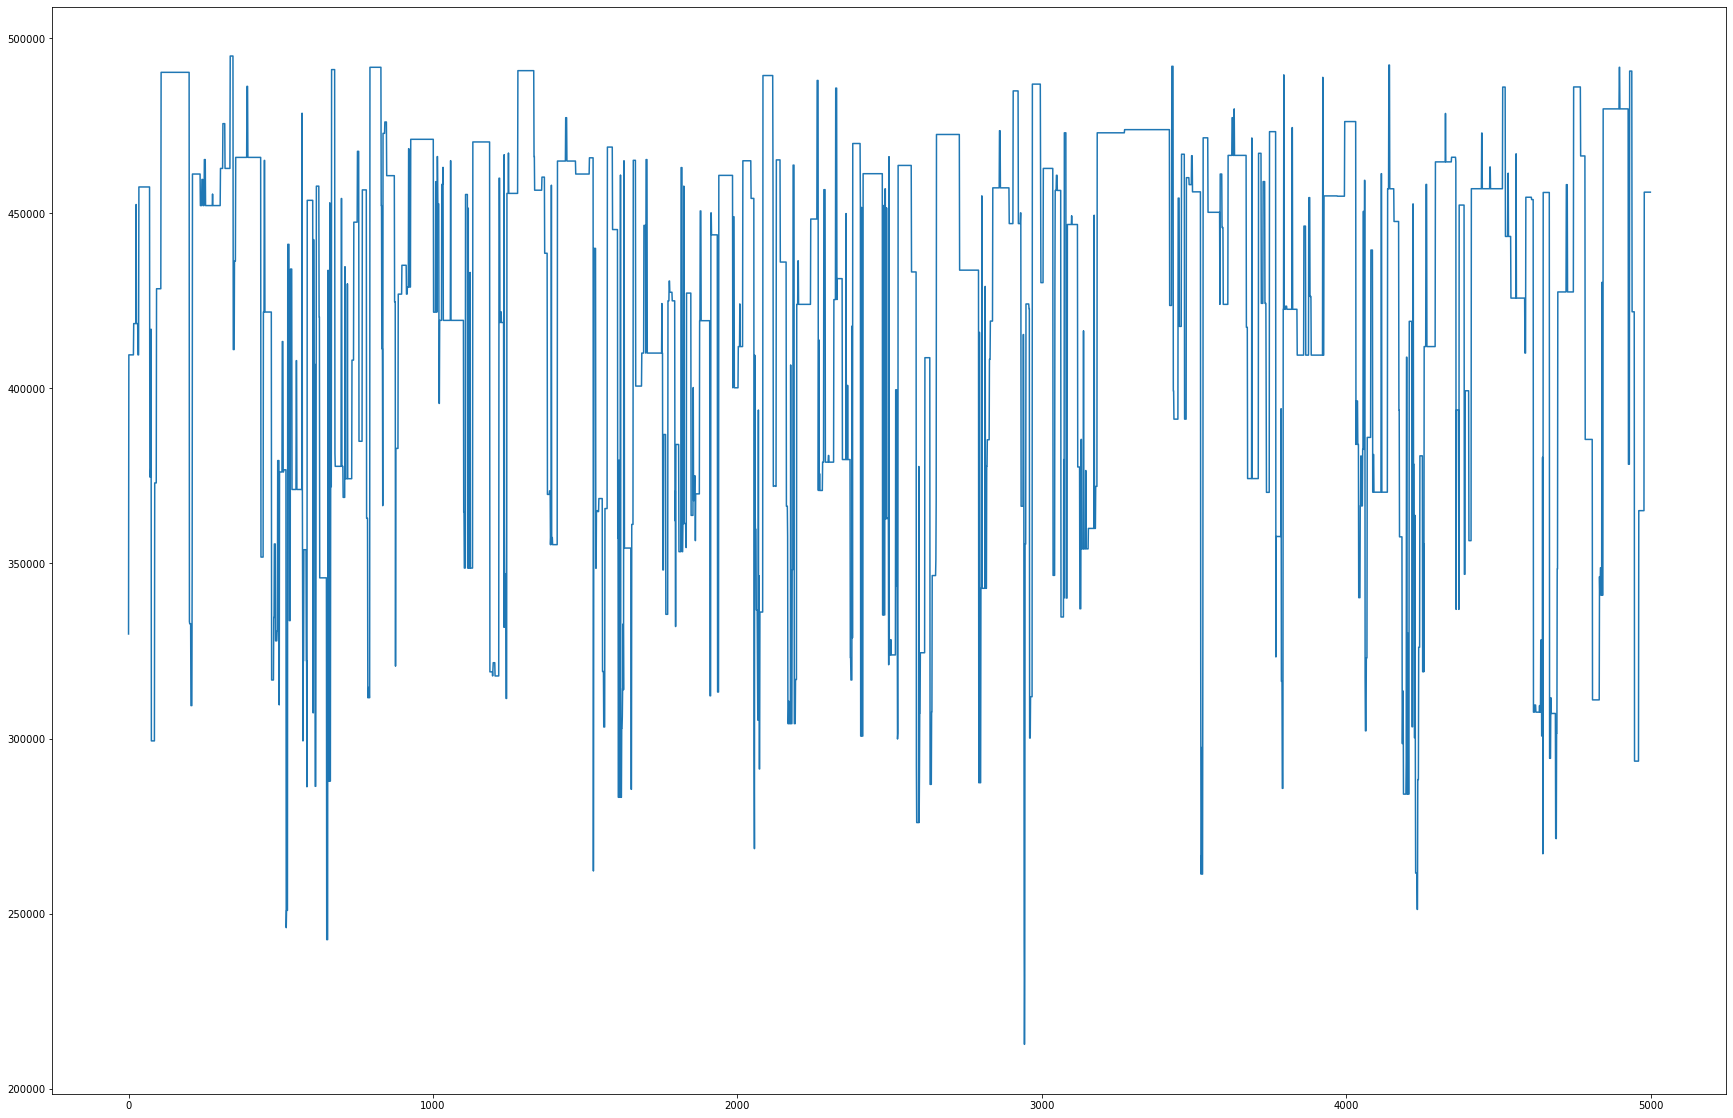

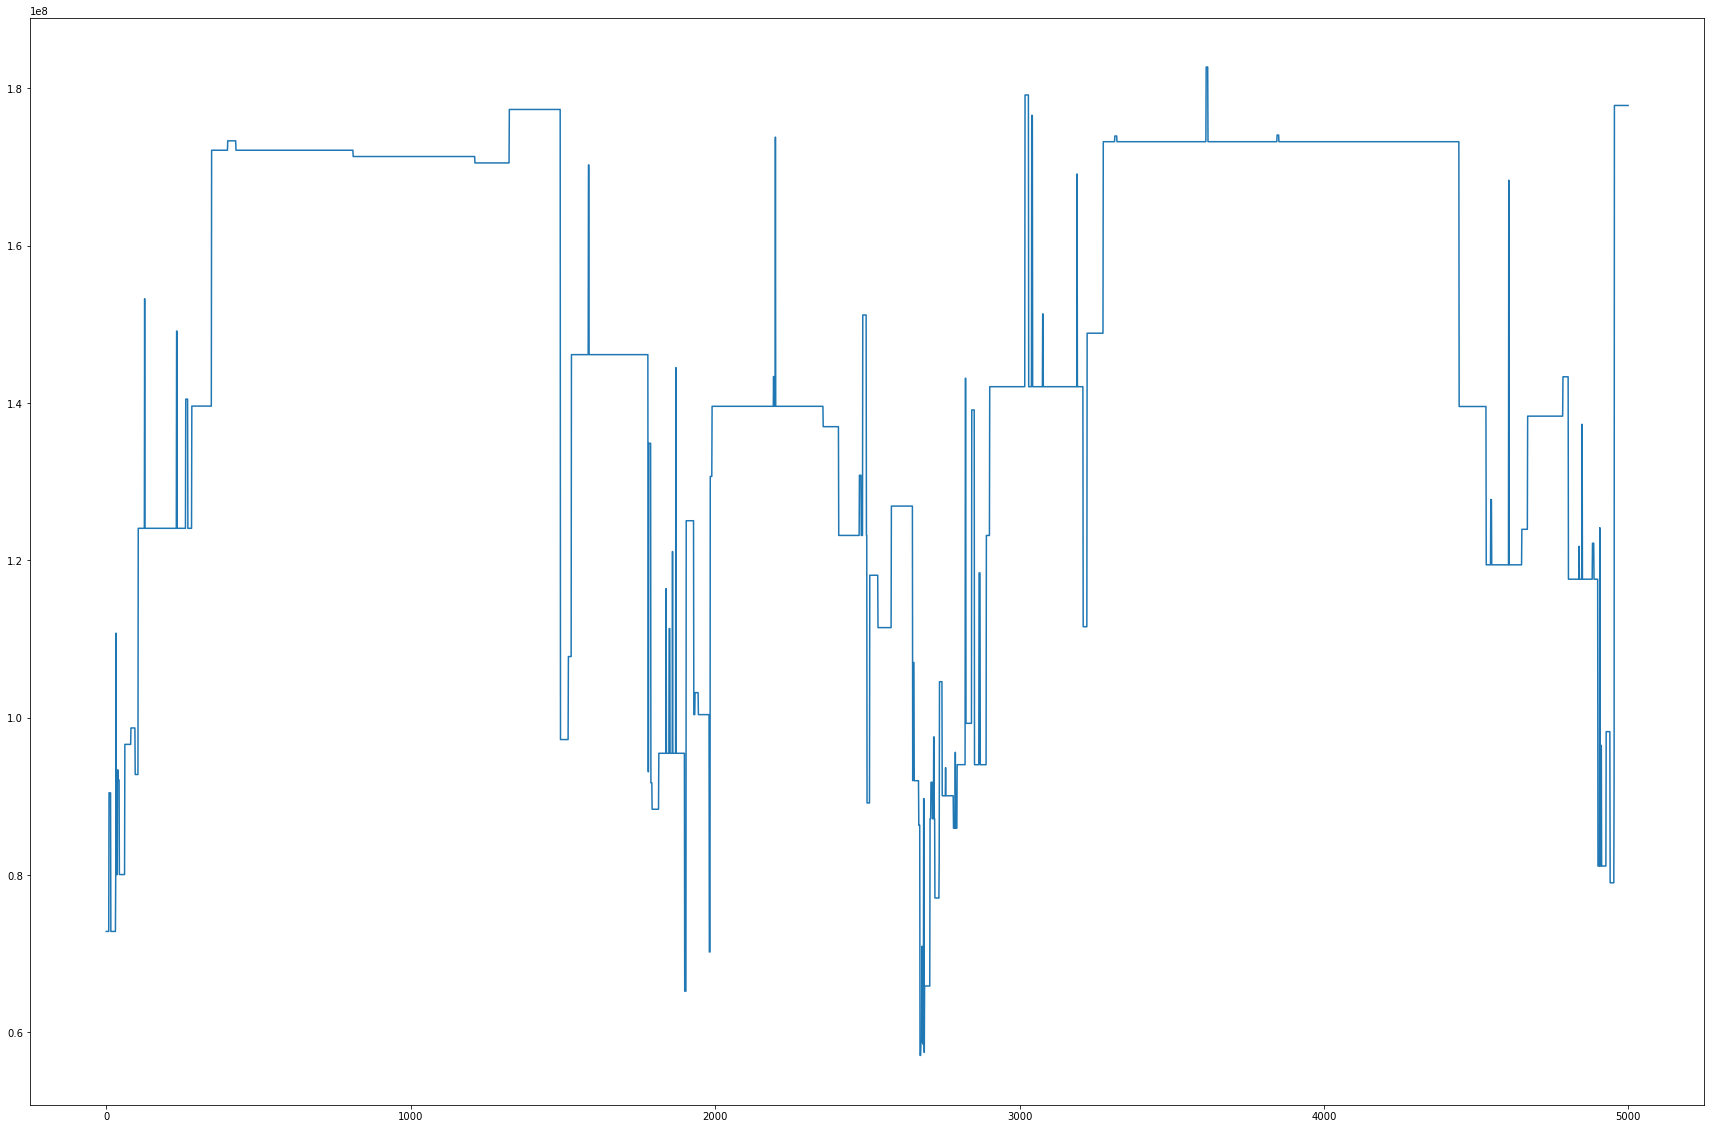

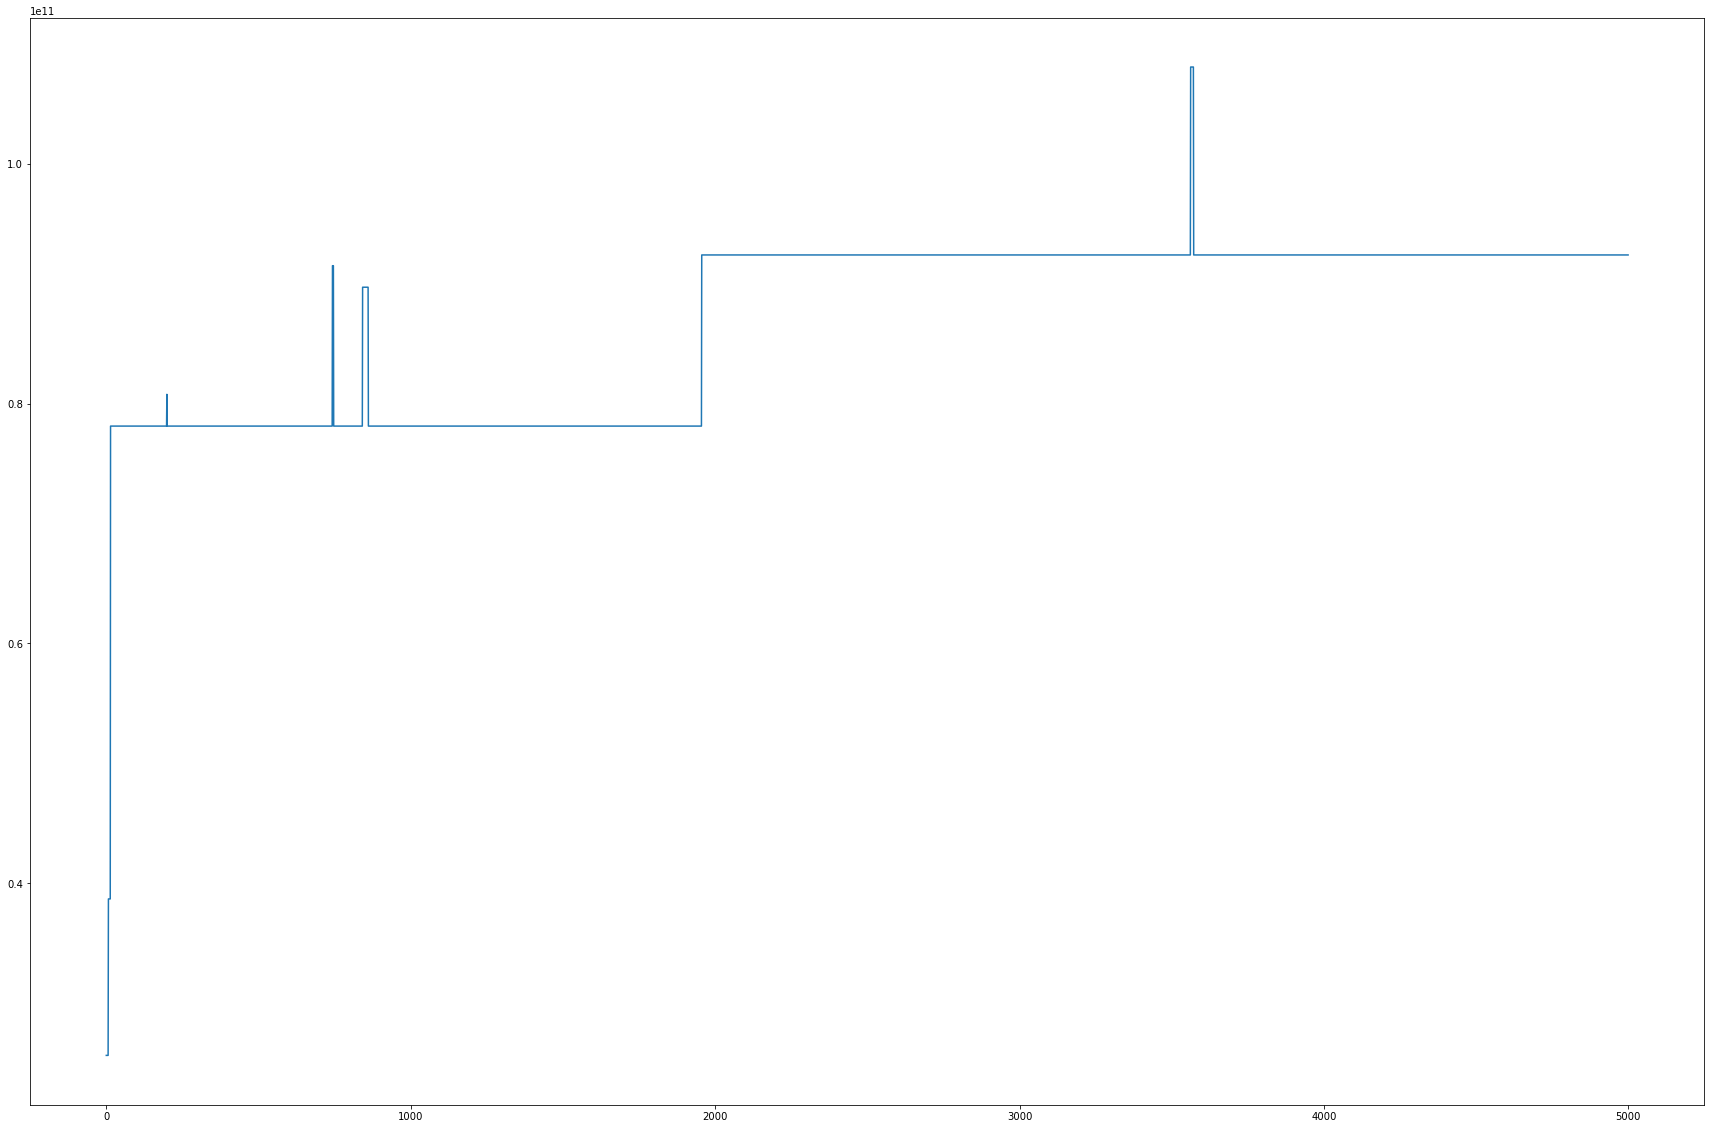

In [51]:
x = np.arange(0,5000)
plt.figure(figsize=(30,20))
plt.plot(x,e4[3])
plt.show()

plt.figure(figsize=(30,20))
plt.plot(x,e5[3],main=)
plt.show()

plt.figure(figsize=(30,20))
plt.plot(x,e6[3])
plt.show()

plt.figure(figsize=(30,20))
plt.plot(x,e7[3])
plt.show()

Avec cette fonction, on arrive à déterminer en fonction de la taille de la matrice que l'on veut, à partir d'une liste des premiers nombres premiers consécutifs, la meilleure permutation pour obtenir la plus grande énergie. Cette fonction nous retourne aussi l'énergie de cette permutation, ainsi que la génération à laquelle cette permutation est apparue. 

On remarque que les énergies obtenues avec $n=4$ et $n=5$ ne convergent pas très bien, mais quand on augmente n, cette convergence s'améliore. Elle n'est tout de même pas très optimale, et les "bonnes" permutations qui ont les plus hautes énergies sont tout autant susceptibles de muter que les autres. Il ne semble pas évident de modifier la fonction *mutation* pour améliorer cela mais essayons de déterminer si cette convergence peut être amenée à s'améliorer si on change la probabilité de mutation. Essayons pour $n=4$ et $n=5$ 

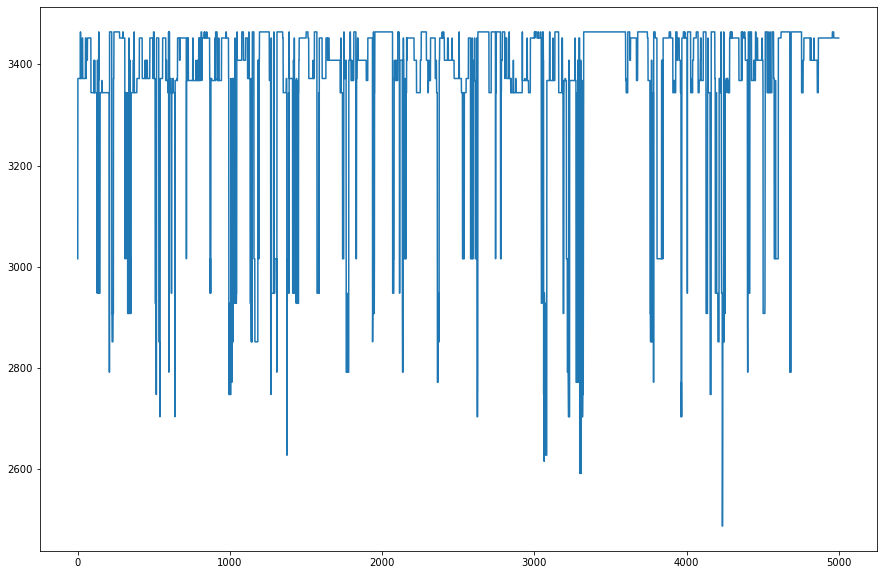

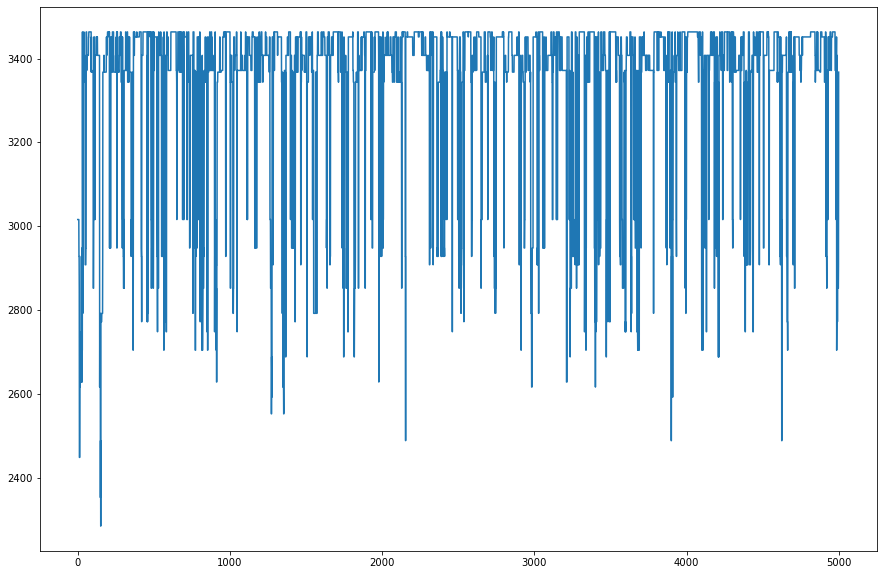

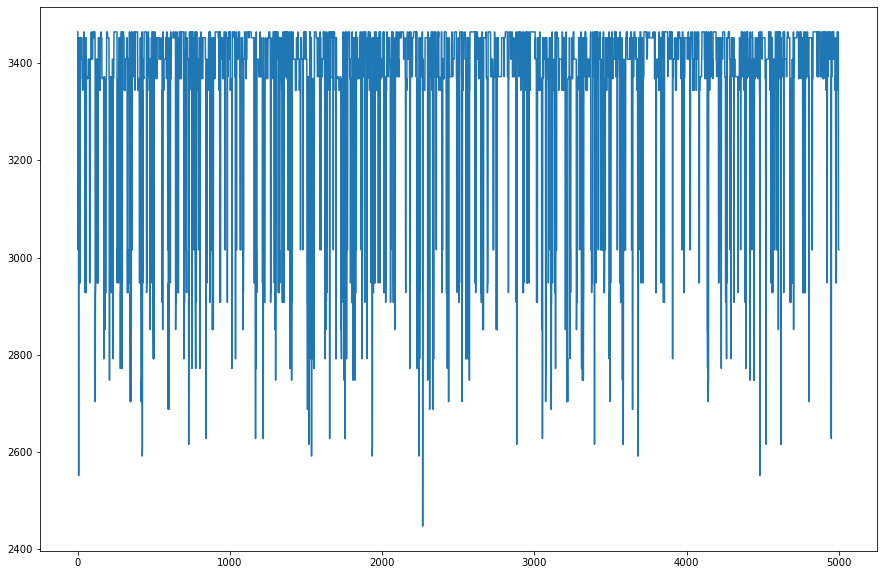

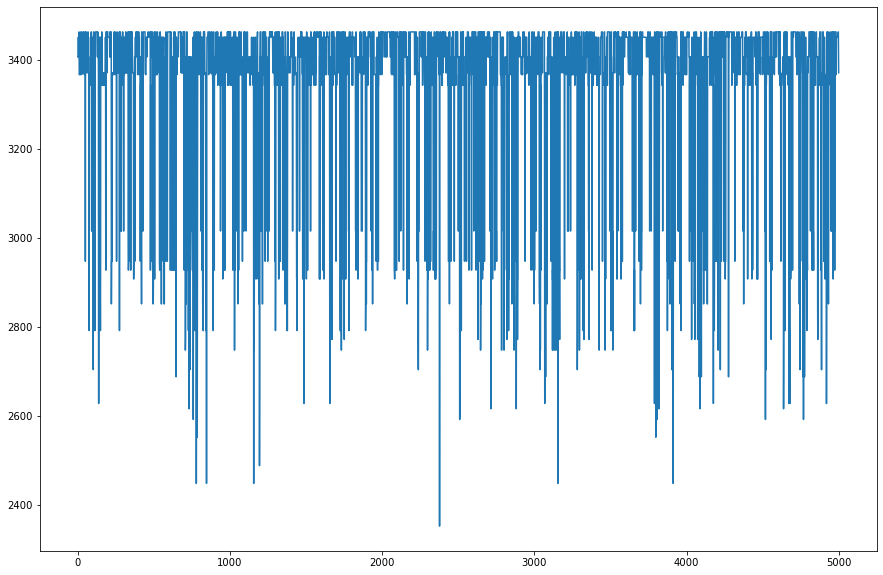

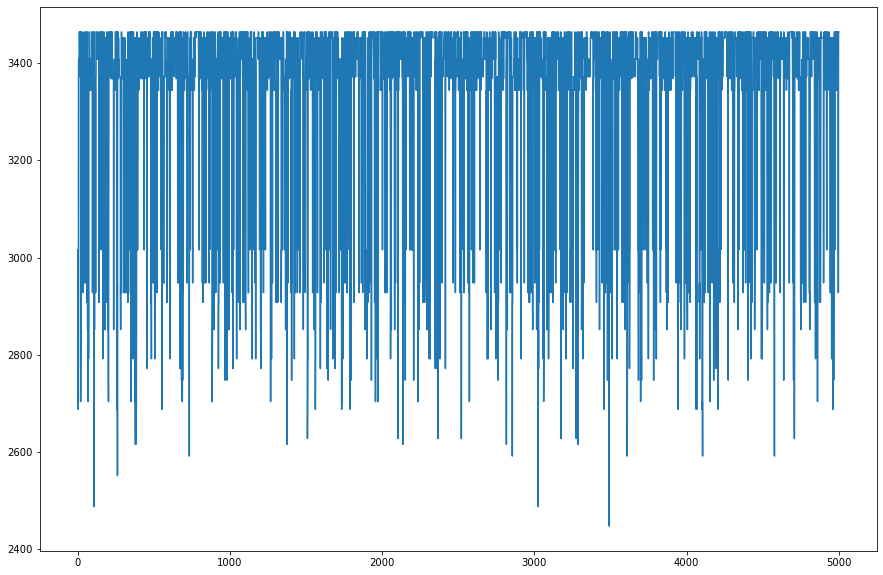

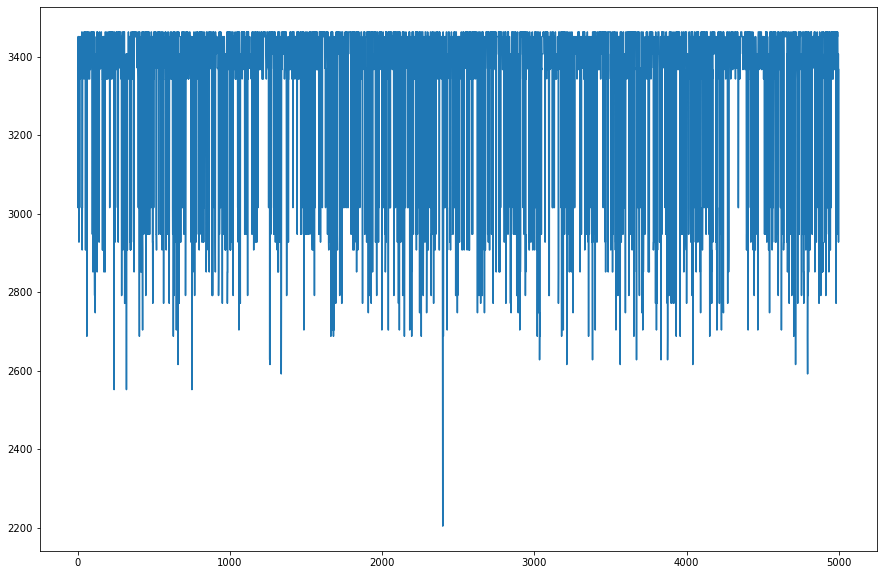

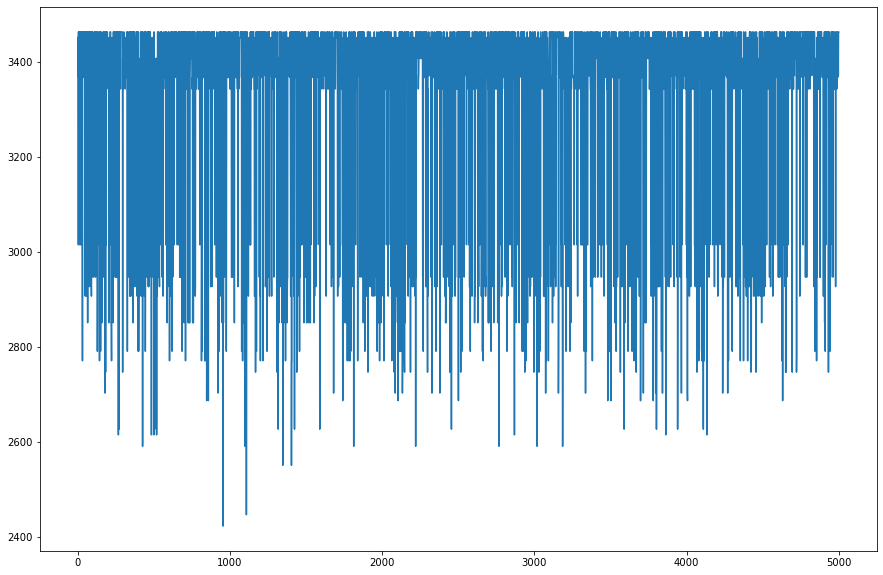

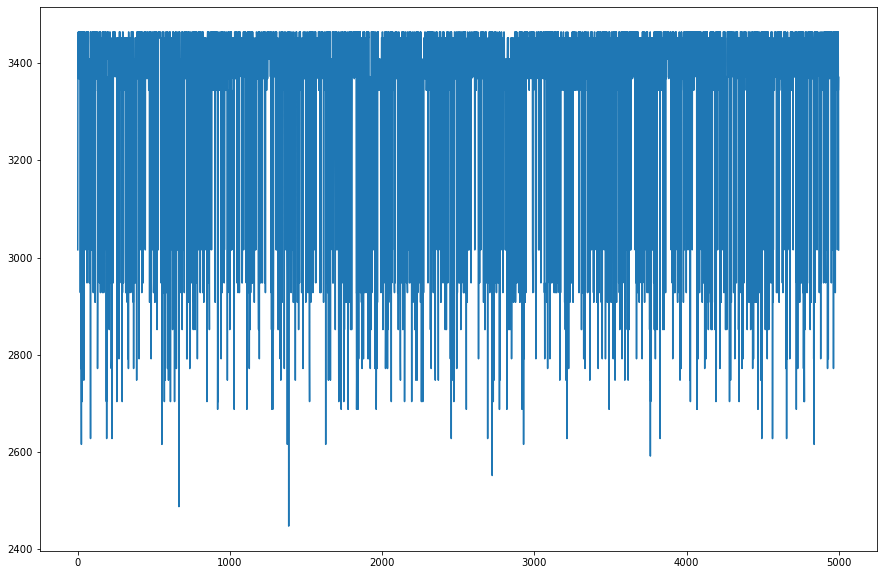

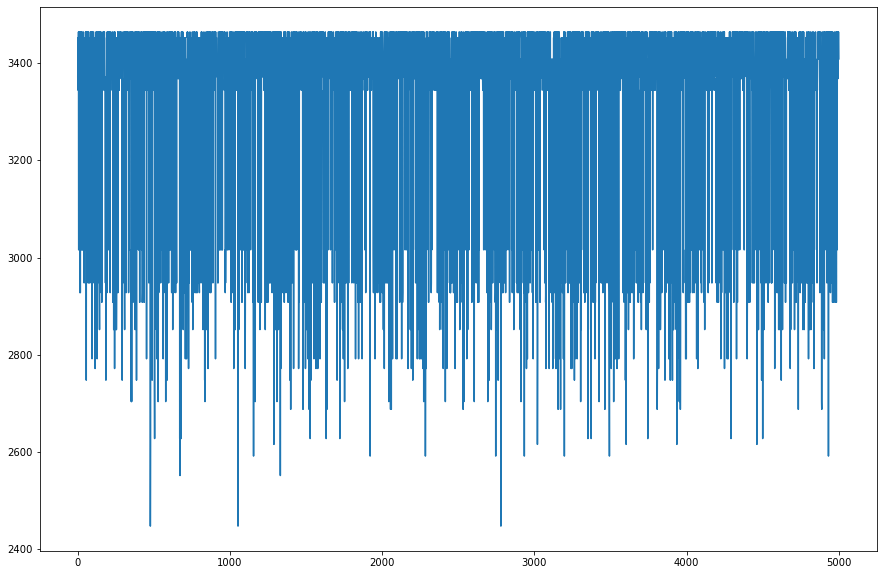

In [53]:
liste_gen = []
for i in range(1,10):
    proba_mut = 10*i/100
    e4 = meilleure_population(4)
    plt.figure(figsize=(15,10))
    plt.plot(x,e4[3])
    plt.show()

Le problème de non-convergence ne semble pas seulement venir de la probabilité de mutation. Je suspecte le fait que ma fonction mutation ne prenne pas en compte la qualité de l'individu avant de décider de la mutation : essayons de modifier cette fonction pour que la probabilité de mutation soit inversement proportionelle à l'énergie de l'individu. *Le choix fait ici pour la probabilité sera totalement arbitraire, j'ai commencé par faire $1 - proba_{selection}$ mais le résultat laissait encore à désirer*

In [173]:
def mutation(population,n,best_energy_ever):
    energie_pop = [energie(graphe(n),adjacente(n,e)) for e in population] #liste qui contient l'energie de chaque élement de notre population
    energie_max = best_energy_ever
    energie_min = min(energie_pop)
    if energie_max == 0 or energie_max==energie_min:
        for i in range(0,len(population)):
            population[i] = list(np.random.permutation(population[i]))
            return
    # probabilité de selection
    proba_mut = [(energie_max-energie)/(energie_max-energie_min) for energie in energie_pop]
    for i in range(0,len(population)):
        proba_muta = proba_mut[i]
        if rand() < proba_muta:
            population[i] = list(np.random.permutation(population[i]))
                   
                  

In [174]:
def cycle_de_vie(pop,n,best_energy_ever):
    # 1. Mutation
    mutation(pop,n,best_energy_ever) 
    # 2. Selection
    energie_pop = [energie(graphe(n),adjacente(n,e)) for e in pop] #liste qui contient l'energie de chaque élement de notre population
    const_norm = sum(energie_pop)
    # probabilité de selection
    proba_sel = [energie / const_norm for energie in energie_pop] #probabilité de selection de chaque élément de notre population
    # Construction de la génération suivante
    next_gen = []
    for i in range(taille_pop):
        k = loi_discrete(proba_sel)
        next_gen.append(pop[k])
        
    return next_gen  

In [175]:
def meilleure_population(n):
    population = population_init(n) 
    nbr_gen = 25000
    best_energy_ever = 0
    best_gen = 0
    best_population = population
    liste_ener = []
    for i in range(nbr_gen):
        population = cycle_de_vie(population,n,best_energy_ever)
        best_energy_this_gen = max([energie(graphe(n),adjacente(n,ind)) for ind in population])
        liste_ener.append(best_energy_this_gen)
        if best_energy_this_gen > best_energy_ever:
            best_energy_ever = best_energy_this_gen
            best_population = population
            best_gen = i
    best_ind = best_population[np.argmax([energie(graphe(n),adjacente(n,best_population[i])) for i in range(0,len(best_population))])]
    return(best_energy_ever,best_ind,best_gen,liste_ener)

#[np.argmax([energie(graphe(n),adjacente(n,best_population[i])) for i in range(0,len(best_population)])]

In [120]:
e4 = meilleure_population(4)
e5 = meilleure_population(5)


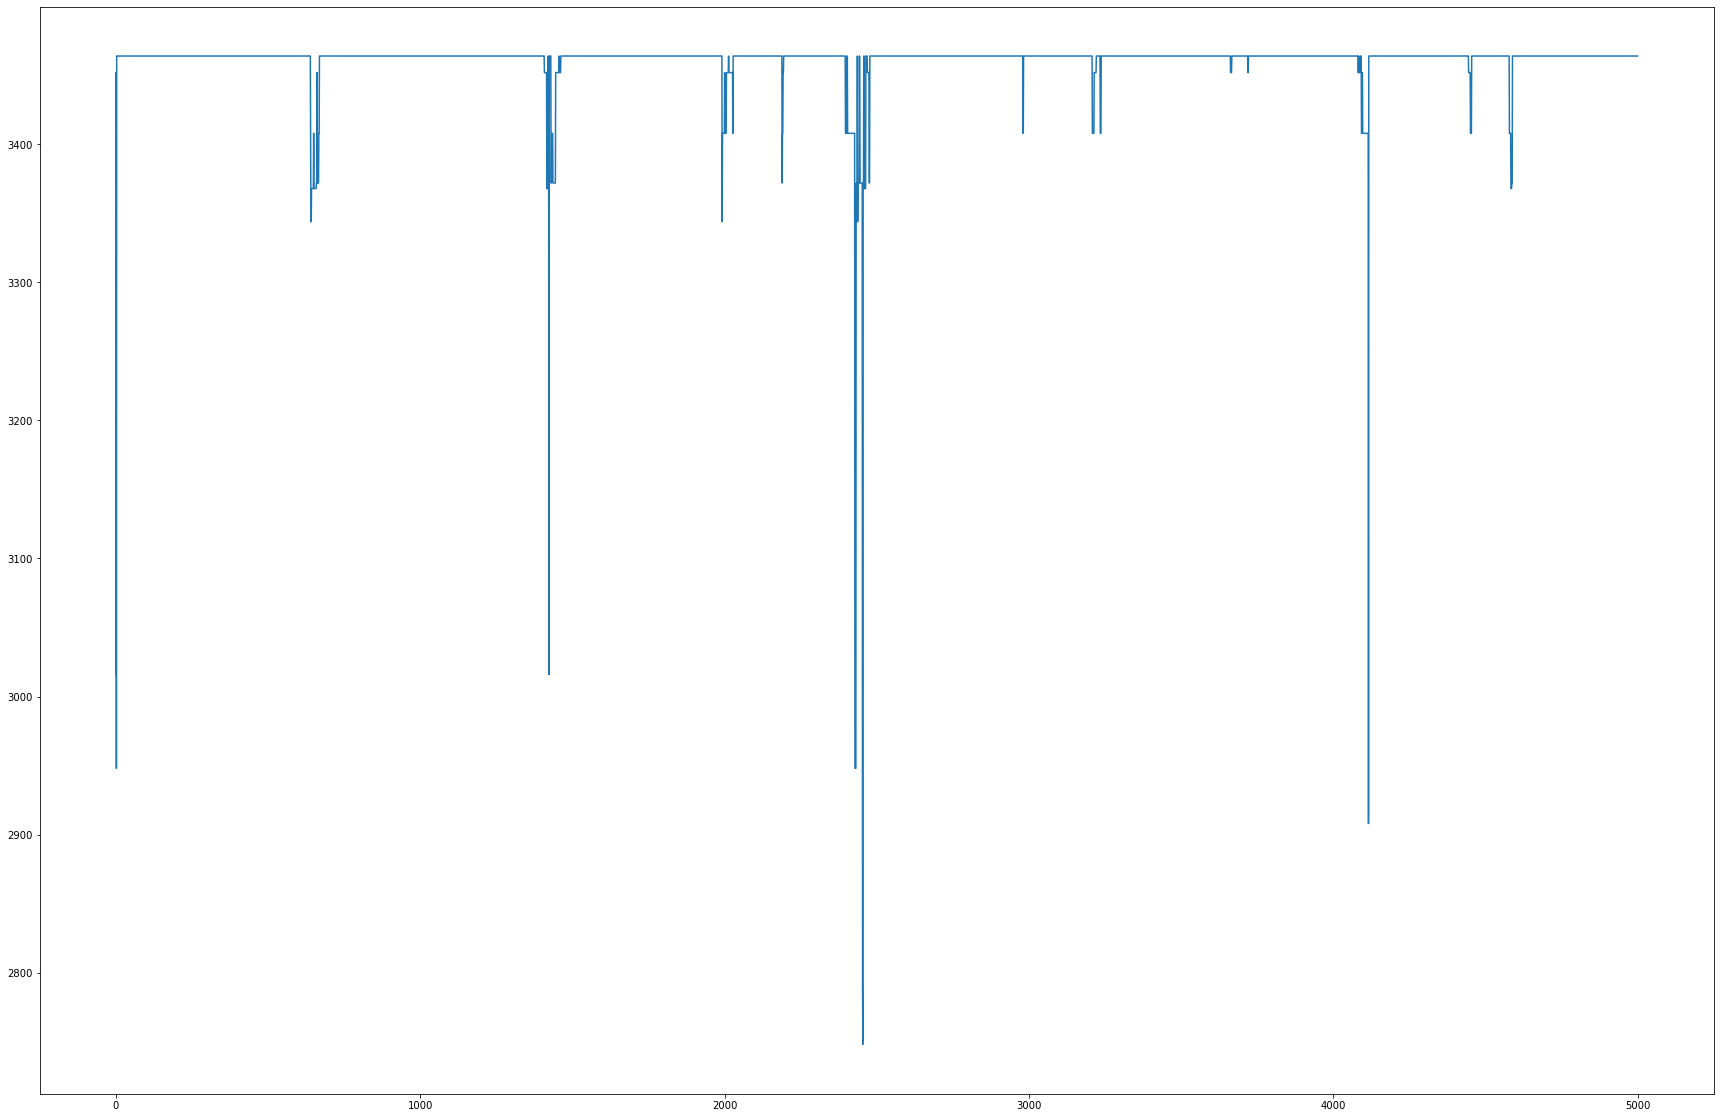

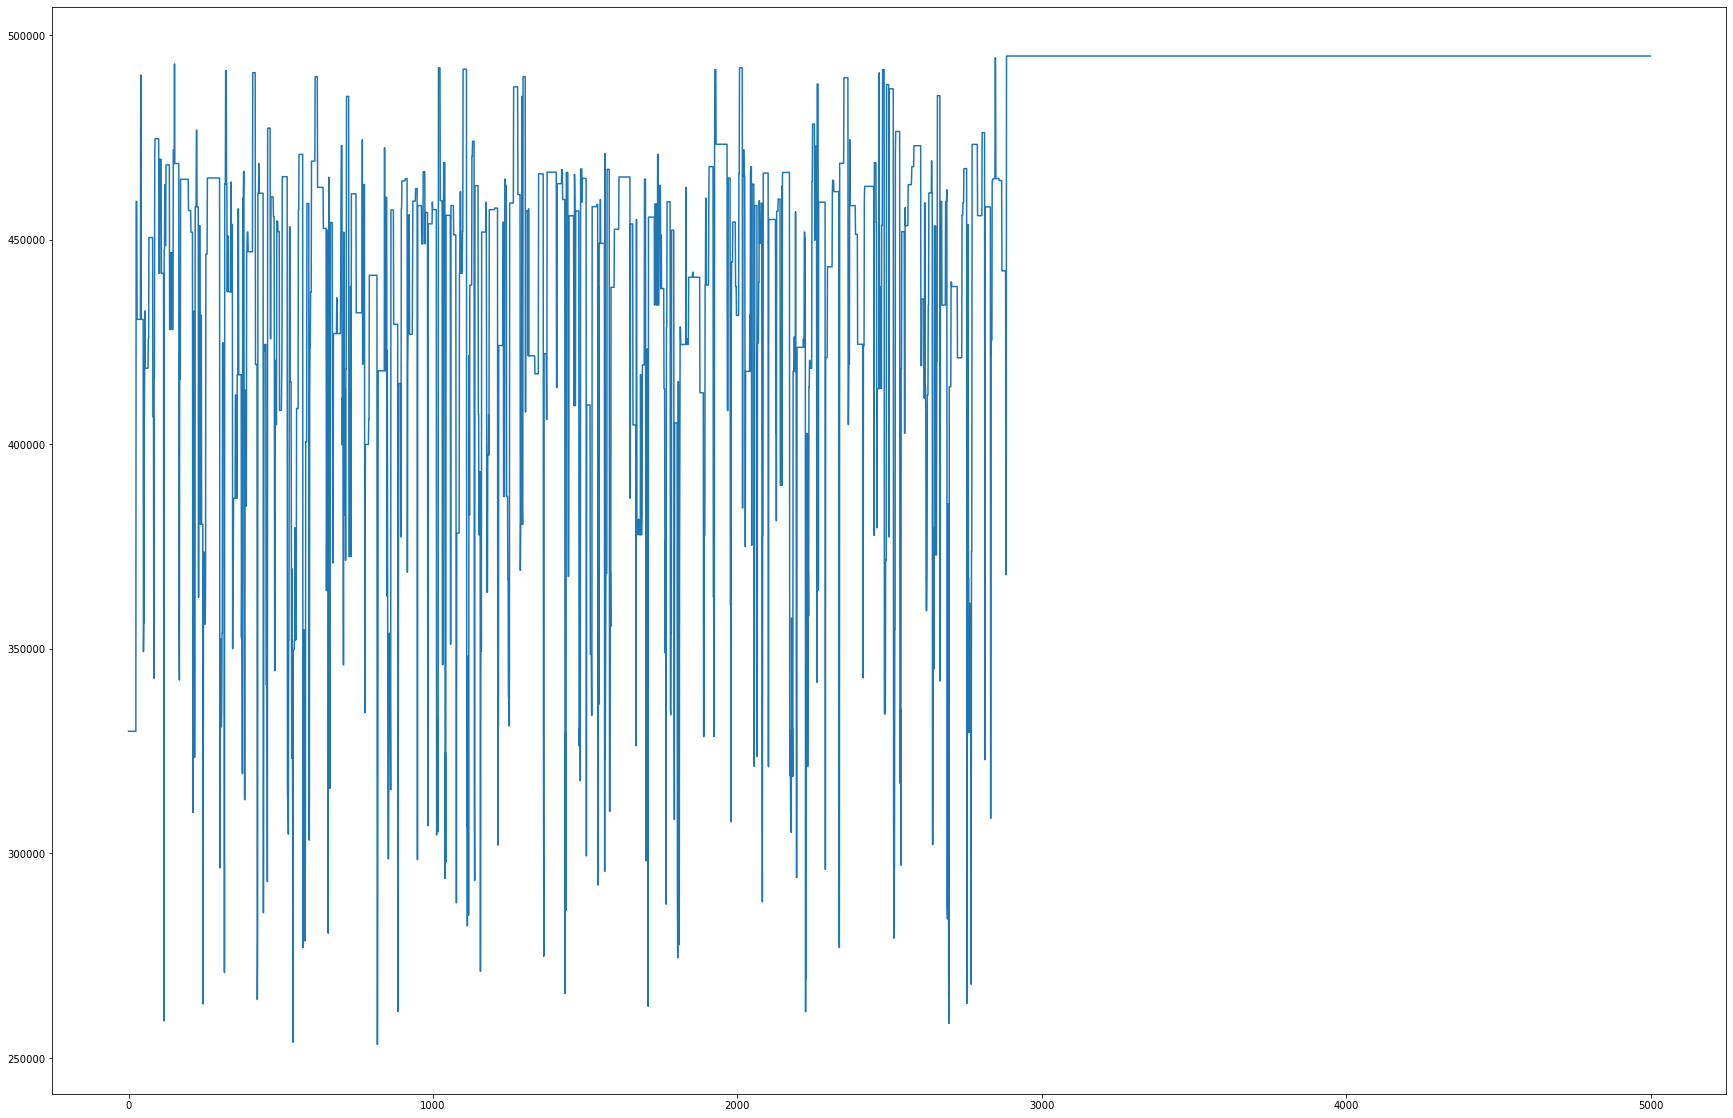

In [122]:
x = np.arange(0,25000)
plt.figure(figsize=(30,20))
plt.plot(x,e4[3])
plt.show()

plt.figure(figsize=(30,20))
plt.plot(x,e5[3])
plt.show()

Voilà des résultats pour la convergence qui semblent bien meilleurs! La modification que j'ai fait est la suivante : pour chaque individu de ma population, la probabilité de mutation est **le rapport entre l'écart l'énergie de cet individu et l'énergie maximale, sur l'écart entre l'énergie minimale et maximale de ma population.** De ce fait, plus l'individu aura une énergie optimale, et moins il sera suscpetible de muter, et inversement !

Maintenant que la convergence de notre population est plutôt bonne, déterminons les permutations optimales pour $n=4,5,6,7$.

In [186]:
meilleur4 = meilleure_population(4)
meilleur5 = meilleure_population(5)
meilleur6 = meilleure_population(6)
meilleur7 = meilleure_population(7)

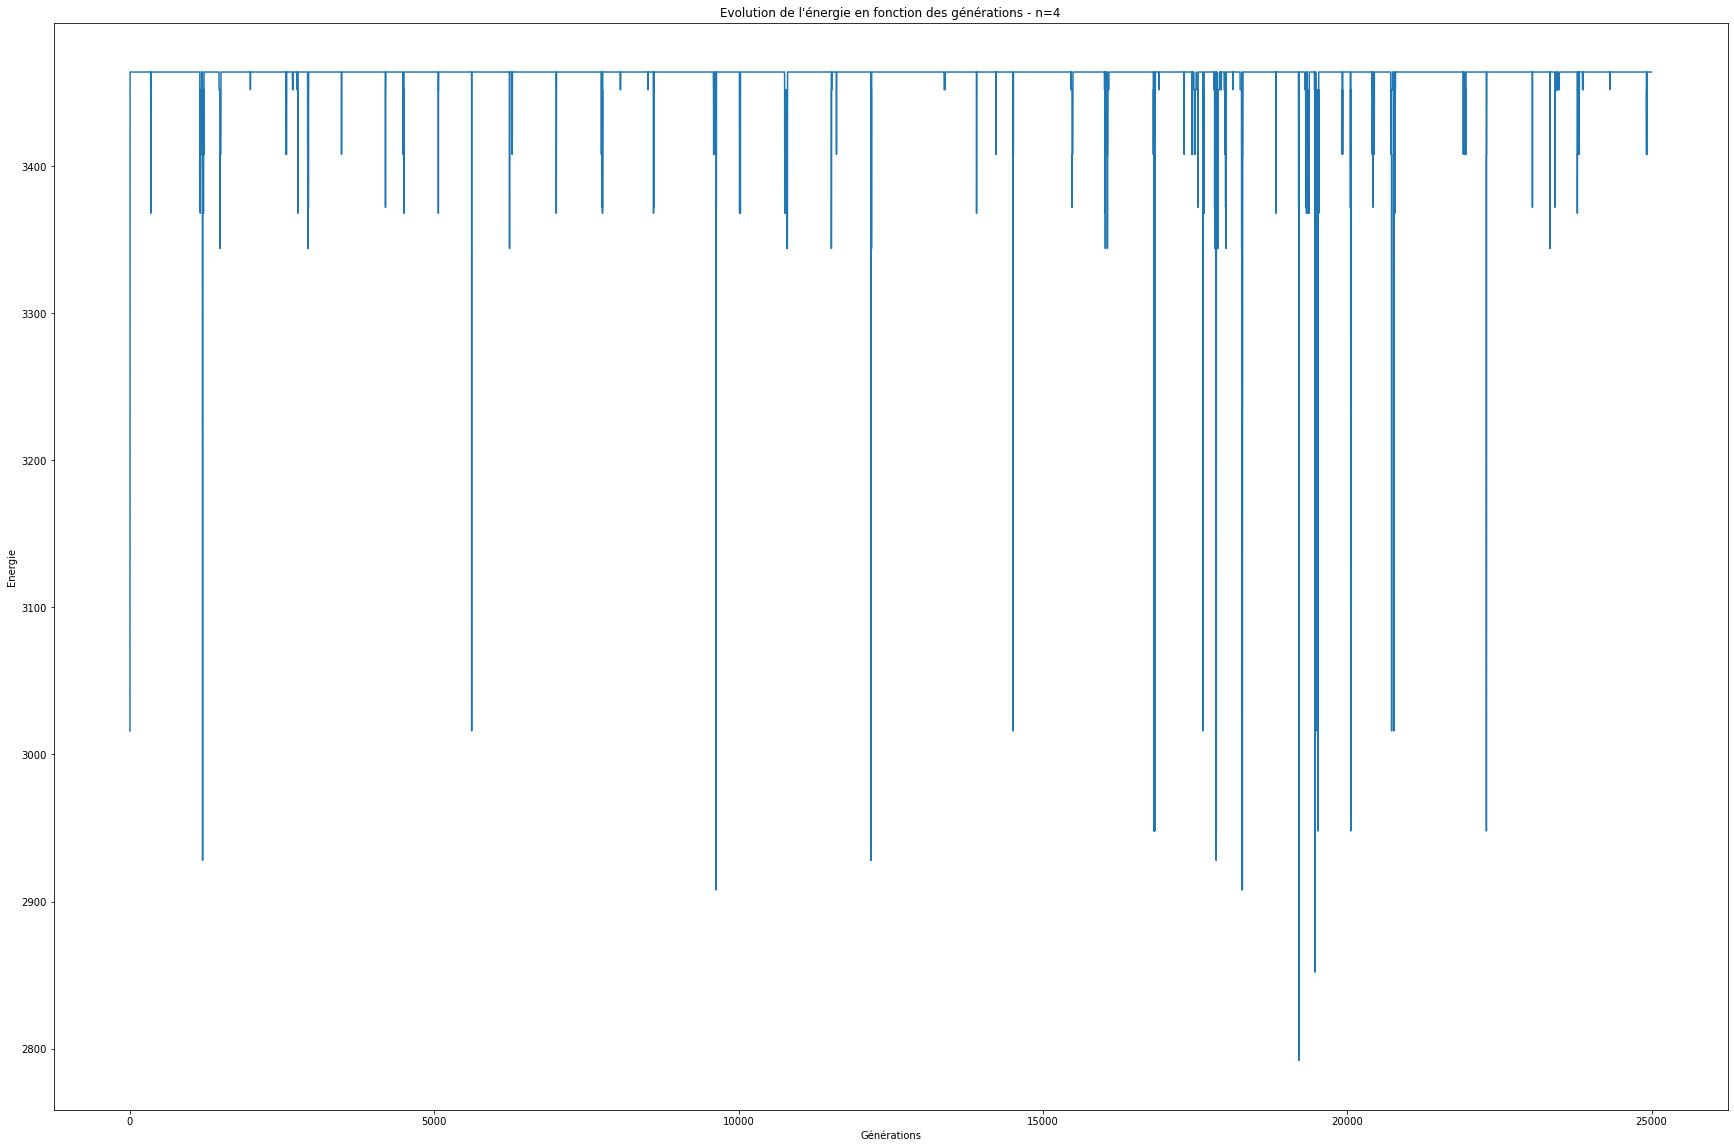

La permutation la plus optimale trouvée est  [11, 3, 5, 13, 17, 7]  avec une énergie de 3464 .


In [193]:
x = np.arange(0,25000)

plt.figure(figsize=(30,20))
plt.plot(x,meilleur4[3])
plt.title("Evolution de l'énergie en fonction des générations - n=4")
plt.xlabel("Générations")
plt.ylabel("Energie")
plt.show()
print("La permutation la plus optimale trouvée est ",meilleur4[1]," avec une énergie de",meilleur4[0],".")


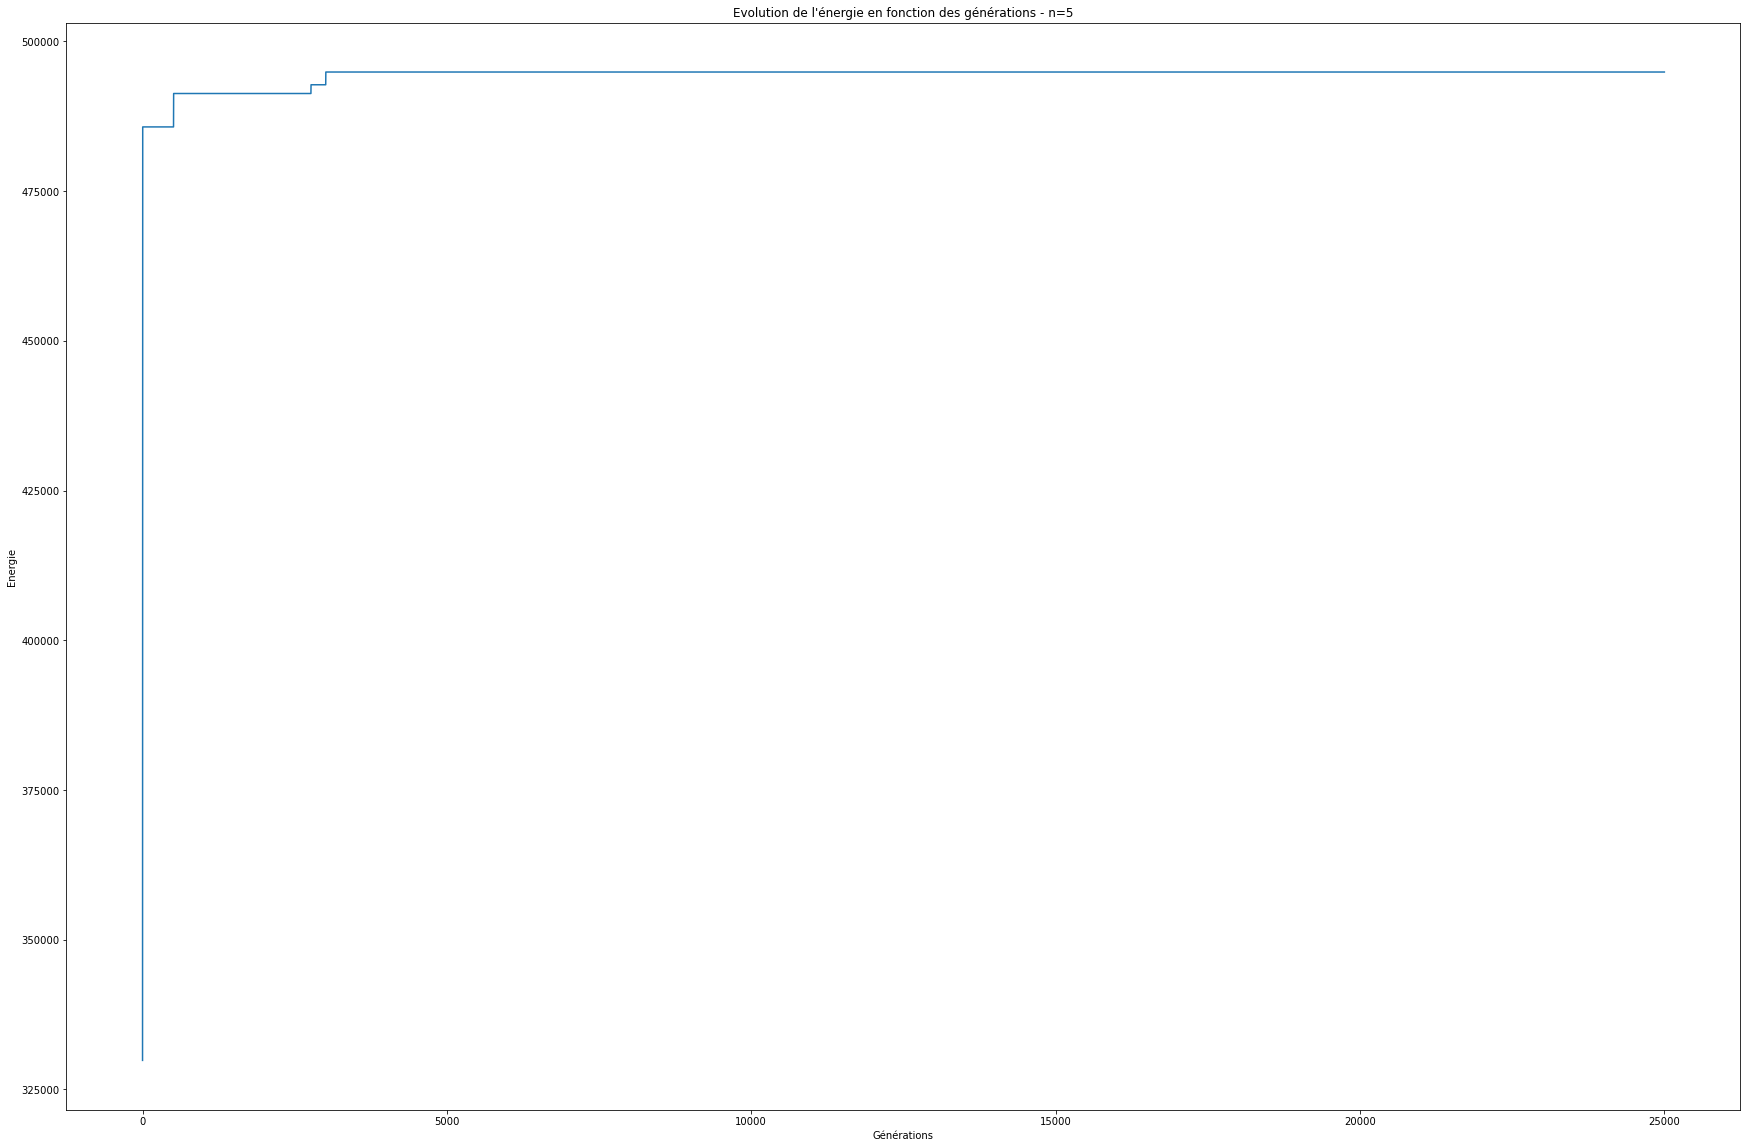

La permutation la plus optimale trouvée est  [17, 11, 31, 13, 5, 29, 7, 19, 3, 23]  avec une énergie de 494893 .


In [194]:
plt.figure(figsize=(30,20))
plt.plot(x,meilleur5[3])
plt.title("Evolution de l'énergie en fonction des générations - n=5")
plt.xlabel("Générations")
plt.ylabel("Energie")
plt.show()
print("La permutation la plus optimale trouvée est ",meilleur5[1]," avec une énergie de",meilleur5[0],".")


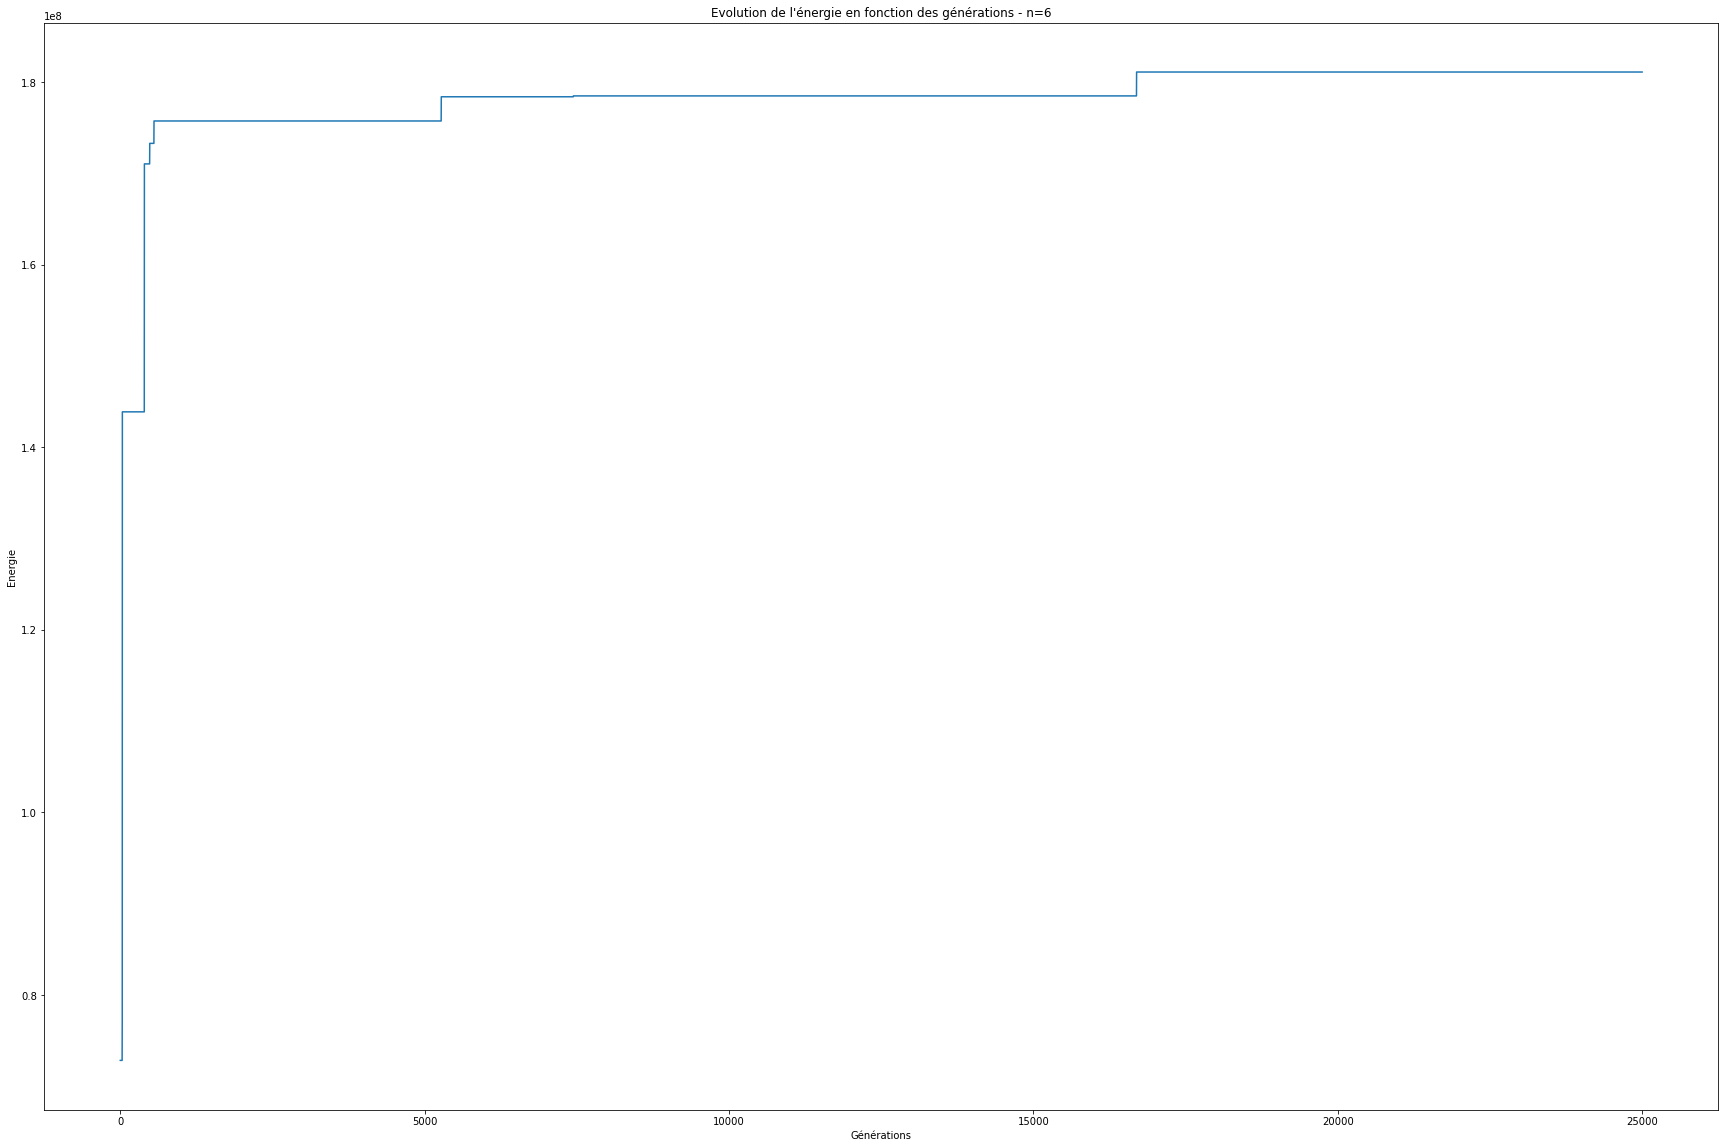

La permutation la plus optimale trouvée est  [53, 47, 41, 43, 37, 5, 23, 11, 17, 19, 13, 7, 31, 29, 3]  avec une énergie de 181098802 .


In [195]:
plt.figure(figsize=(30,20))
plt.plot(x,meilleur6[3])
plt.title("Evolution de l'énergie en fonction des générations - n=6")
plt.xlabel("Générations")
plt.ylabel("Energie")
plt.show()
print("La permutation la plus optimale trouvée est ",meilleur6[1]," avec une énergie de",meilleur6[0],".")

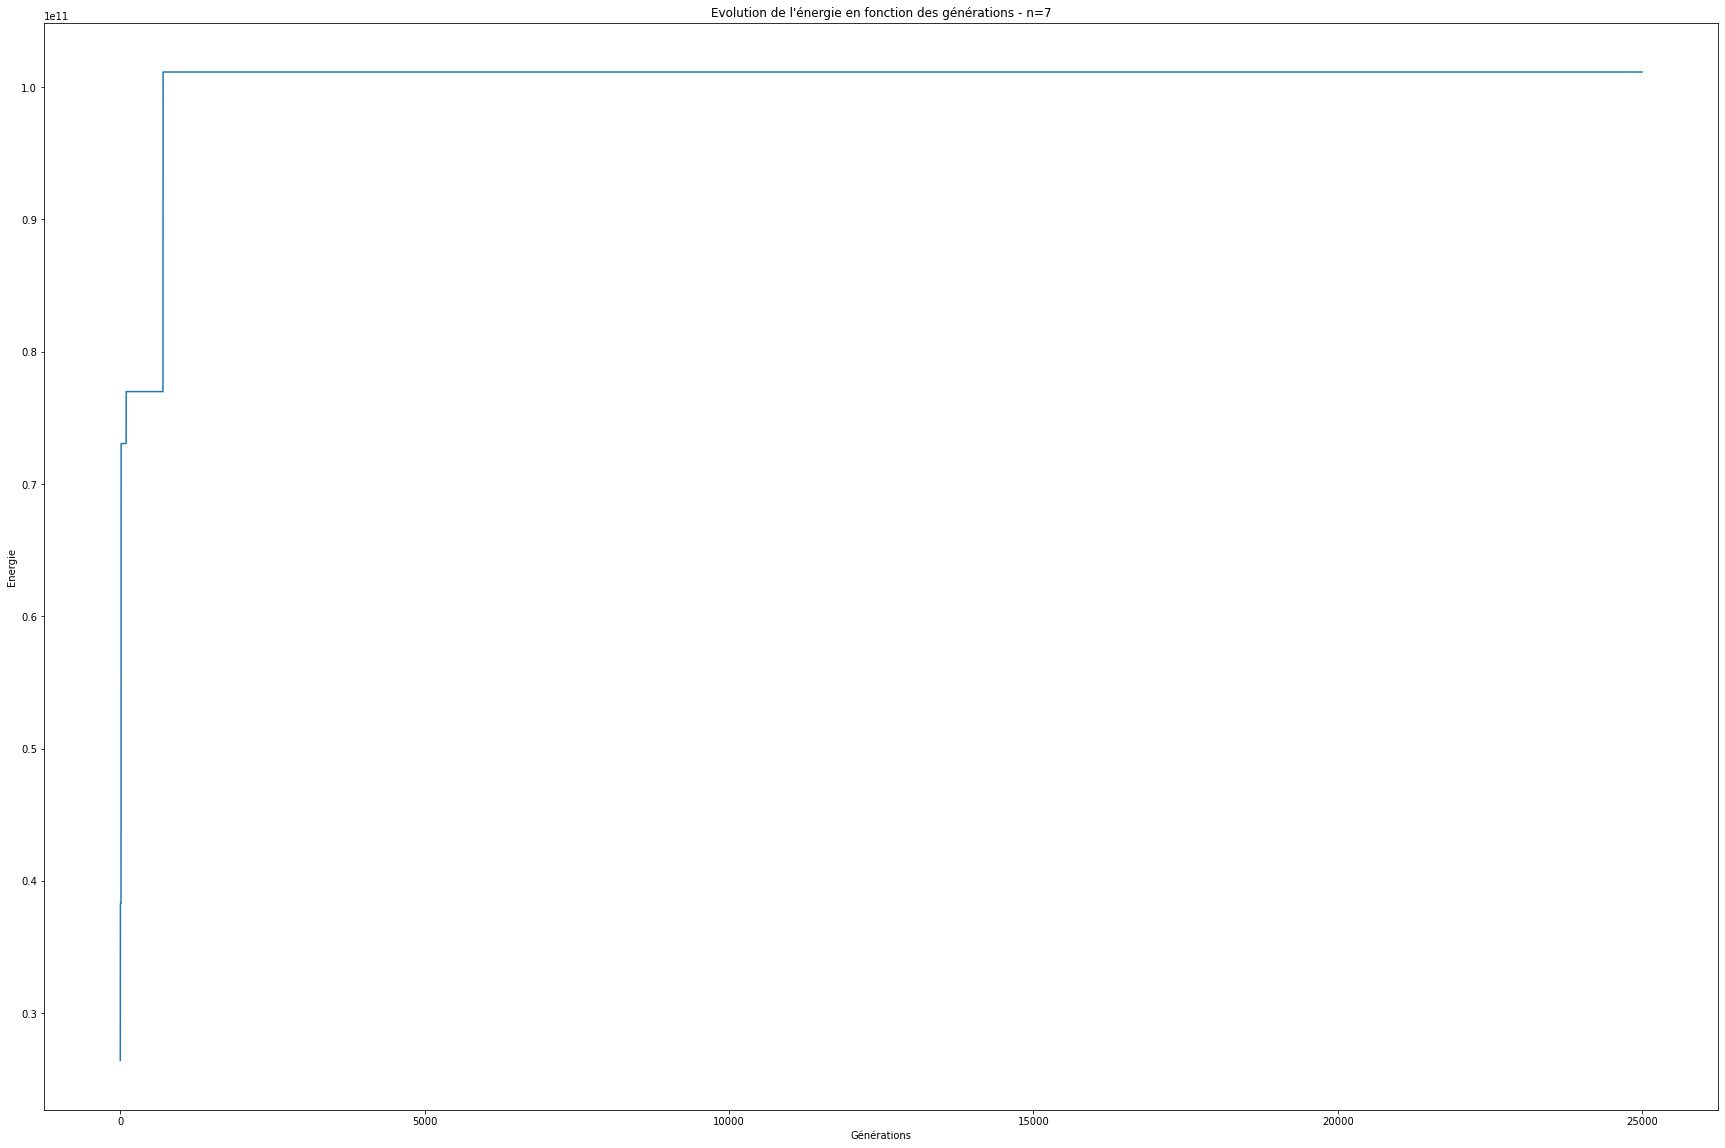

La permutation la plus optimale trouvée est  [31, 23, 19, 5, 43, 59, 13, 11, 7, 3, 73, 53, 47, 17, 67, 29, 41, 79, 37, 61, 71]  avec une énergie de 101144917039 .


In [196]:

plt.figure(figsize=(30,20))
plt.plot(x,meilleur7[3])
plt.title("Evolution de l'énergie en fonction des générations - n=7")
plt.xlabel("Générations")
plt.ylabel("Energie")
plt.show()
print("La permutation la plus optimale trouvée est ",meilleur7[1]," avec une énergie de",meilleur7[0],".")


Vérifions simplement que les énergies obtenus correspondent bien aux permutations, par exemple avec n = 7 :

In [226]:
b = adjacente(7,[31, 23, 19, 5, 43, 59, 13, 11, 7, 3, 73, 53, 47, 17, 67, 29, 41, 79, 37, 61, 71])

In [224]:
a = np.array([31, 23, 19, 5, 43, 59, 13, 11, 7, 3, 73, 53, 47, 17, 67, 29, 41, 79, 37, 61, 71])

In [238]:
n = 7
energie(a,b)

101144917039

# Conclusion

Je pense que la partie la plus intéressante en terme d'algorithme stochiastique lors de ce projet a été de déterminer la probabilité de mutation : comment faire en sorte que la probabilité de mutation diminue en fonction de la qualité de la permutation. En prenant la probabilité que j'ai choisi, ceci est possible, et on nous assure une assez bonne convergence.